## Tasks:

> Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than the mean (hint: do you know this answer intuitively?)

In [3]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# load data
df = pd.read_csv("C:\\Users\\hamma\\Documents\\DataEnrichment\\Lessons\\Use-CDF-to-Calculate-Probabilities-Practice\\weight-height male-female - weight-height.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
# Filter females
females = df.loc[df['Gender'] == 'Female'].copy()
# Filter height column
data = females['Height']
data

5000    58.910732
5001    65.230013
5002    63.369004
5003    64.479997
5004    61.793096
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 5000, dtype: float64

# Question 1

In [15]:
# define high and low end variables
low_end = 55.0
high_end = 56.0

In [40]:
# Define descriptive stats
mean = data.mean()
std = data.std()
min = data.min()
max = data.max()

In [41]:
# Set range for spacing of normal curve
x_range = np.linspace(min,max,1000)

In [42]:
# Create probability distribution function
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)

In [43]:
# Create cumulative distribution function
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

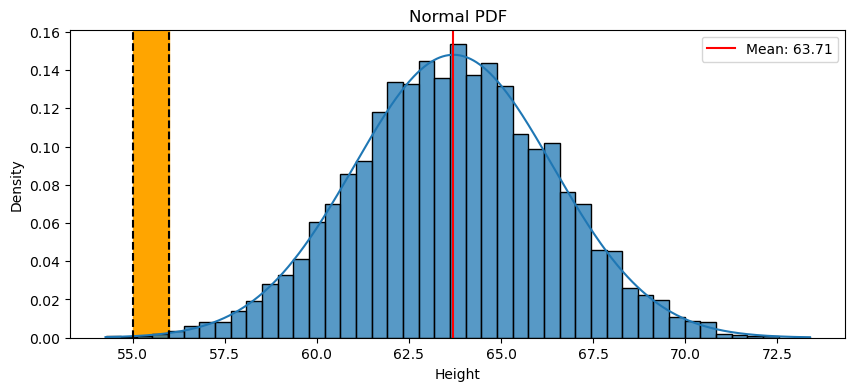

In [76]:
# Visualize normal probability function
fig,ax = plt.subplots(figsize=(10,4))

sns.histplot(x=data, stat='density')
ax.plot(x_range,pdf)
ax.set_title('Normal PDF')
ax.axvline(low_end, c='k', ls='--')
ax.axvline(high_end, c='k', ls='--')
ax.axvline(mean, c='red', label=f'Mean: {mean:,.2f}')
ax.axvspan(low_end, high_end, color='orange', zorder=0)
plt.legend();

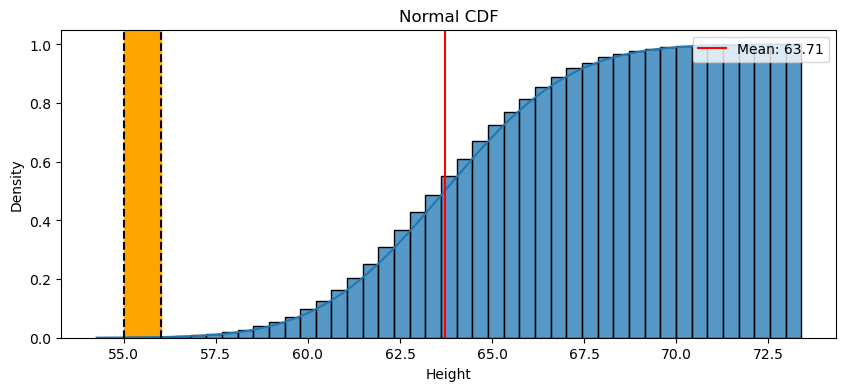

In [80]:
# Plot normal cumulative distribution function
fig,ax = plt.subplots(figsize=(10,4))

sns.histplot(x=data, stat='density', cumulative=True)
ax.plot(x_range,cdf)
ax.set_title('Normal CDF')
ax.axvline(low_end, c='k', ls='--')
ax.axvline(high_end, c='k', ls='--')
ax.axvline(mean, c='red', label=f'Mean: {mean:,.2f}')
ax.axvspan(low_end, high_end, color='orange', zorder=0)
plt.legend(loc='upper right');

In [82]:
# Find the probability of a female being between 55 and 56 inches
proba = stats.norm.cdf(high_end, loc=mean, scale=std) - stats.norm.cdf(low_end, 
                                                                       loc=mean,
                                                                      scale=std)
proba * 100

0.15055206795372414

# Question 2

In [85]:
# Probability of a female being less than 60 inches
proba_2 = stats.norm.cdf(60, loc=mean, scale=std)
proba_2 * 100

8.44862355340375

## Question 3

In [86]:
# Probability of a female being taller than the mean height
proba_3 = 1 - stats.norm.cdf(63.71, loc=mean, scale=std)
proba_3 * 100

49.98185423295898